In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

c:\Users\duyni\Documents\Learn-Quantum-Computing-with-Python-and-IBM-Quantum-Experience\quantum_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Chapter 9 - Monitoring and Optimizing circuits

## Monitoring and Tracking Jobs

In [2]:
# Import the Qiskit Jupyter tools 
from qiskit.tools import jupyter


In [ ]:
# Initialize the job tracker to automatically track all jobs
%qiskit_job_watcher


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [3]:
# Let's run a simple circuit on the least busy quantum device 
# and check the job watcher widget.
from qiskit.providers.ibmq import least_busy

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (2) and 
                                       not x.configuration().simulator 
                                       and x.status().operational==True))

#Create a simple circuit
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
#Execute the circuit on the backend
job = execute(qc, backend)


KeyboardInterrupt: 

In [6]:
#Disable the job watcher
%qiskit_disable_job_watcher


In [7]:
#Display the list of all available backends and provide 
#a brief overview of each 
%qiskit_backend_overview
# currently no backends can be seen from main website (07/07/23 update)


ZeroDivisionError: division by zero

# Transpiling a Circuit

In [4]:
# Import the transpiler passes object
from qiskit.transpiler import passes
# List out all the passes available
print(dir(passes))


['ApplyLayout', 'BarrierBeforeFinalMeasurements', 'BasicSwap', 'BasisTranslator', 'CSPLayout', 'CXCancellation', 'CXDirection', 'CheckCXDirection', 'CheckMap', 'Collect2qBlocks', 'CommutationAnalysis', 'CommutativeCancellation', 'ConsolidateBlocks', 'CountOps', 'CountOpsLongestPath', 'CrosstalkAdaptiveSchedule', 'DAGFixedPoint', 'DAGLongestPath', 'Decompose', 'DenseLayout', 'Depth', 'EnlargeWithAncilla', 'FixedPoint', 'FullAncillaAllocation', 'HoareOptimizer', 'Layout2qDistance', 'LayoutTransformation', 'LookaheadSwap', 'MergeAdjacentBarriers', 'NoiseAdaptiveLayout', 'NumTensorFactors', 'Optimize1qGates', 'OptimizeSwapBeforeMeasure', 'RemoveDiagonalGatesBeforeMeasure', 'RemoveFinalMeasurements', 'RemoveResetInZeroState', 'ResourceEstimation', 'SabreLayout', 'SabreSwap', 'SetLayout', 'Size', 'StochasticSwap', 'TrivialLayout', 'UnitarySynthesis', 'Unroll3qOrMore', 'UnrollCustomDefinitions', 'Unroller', 'Width', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__'

In [9]:
#Basic Toffoli gate,
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw()


q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

In [10]:
qc_decomposed = qc.decompose()
qc_decomposed.draw()


┌───┐      
q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                        │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ TDG ├┤ X ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

In [11]:
#Basic circuit with a single and multi-qubit gates
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.draw()


┌───┐               
q_0: ┤ H ├──■────■────■──
     └───┘┌─┴─┐  │    │  
q_1: ─────┤ X ├──┼────┼──
          └───┘┌─┴─┐  │  
q_2: ──────────┤ X ├──┼──
               └───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘

In [12]:
#Print the depth of both inital and decomposed circuit
print('Initial circuit depth: ', qc.depth())
print('Decomposed circuit depth: ', qc_decomposed.depth())
#Get the number of operators in initial circuit
print('Initial circuit operation count: ', qc.count_ops())
#Get the number of operators in decomposed circuit
print('Decomposed circuit operation count: ', qc_decomposed.count_ops())


Initial circuit depth:  4
Decomposed circuit depth:  11
Initial circuit operation count:  OrderedDict([('cx', 3), ('h', 1)])
Decomposed circuit operation count:  OrderedDict([('cx', 6), ('t', 4), ('tdg', 3), ('h', 2)])


# Configuration and Optimization

In [14]:
# Get the backend device: ibmq_santiago 
backend_santiago = provider.get_backend('ibmq_jakarta')
# Launch backend viewer of ibmq_santiago
backend_santiago


UnboundLocalError: local variable 'U1' referenced before assignment

<IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>

In [15]:
# Get the backend device: ibmq_16_melbourne
backend_melbourne = provider.get_backend('ibmq_16_melbourne')
# Launch backend viewer of ibmq_16_melbourne
backend_melbourne


QiskitBackendNotFoundError: 'No backend matches the criteria'

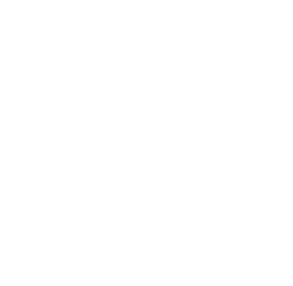

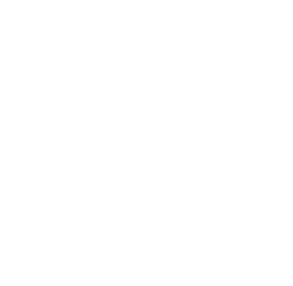

In [17]:
# Visualize the coupling directional map between the qubits 
plot_gate_map(backend_santiago, plot_directed=True)


In [18]:
# Visualize the coupling directional map between the qubits 
plot_gate_map(backend_melbourne, plot_directed=True)


NameError: name 'backend_melbourne' is not defined

In [19]:
# Quantum circuit with a single and multi-qubit gates
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.draw()


┌───┐               
q_0: ┤ H ├──■────■────■──
     └───┘┌─┴─┐  │    │  
q_1: ─────┤ X ├──┼────┼──
          └───┘┌─┴─┐  │  
q_2: ──────────┤ X ├──┼──
               └───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘

Depth: 20


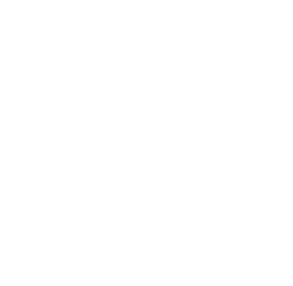

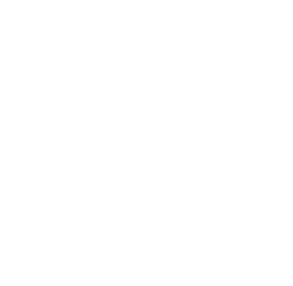

In [20]:
# Transpile the circuit with an optimization level = 0
qc_santiago_0 = transpile(qc, backend_santiago, 
seed_transpiler=10258, optimization_level=0)
# Print out the depth of the circuit
print('Depth:', qc_santiago_0.depth())
# Plot the resulting layout of the quantum circuit after Layout
plot_circuit_layout(qc_santiago_0, backend_santiago)


In [ ]:
# Draw the transpiled circuit pertaining to Santiago
qc_santiago_0.draw()


: 

In [ ]:
# View the transpiled circuit with an optimization level = 0
qc_melbourne_0 = transpile(qc, backend_melbourne, seed_transpiler=10258, optimization_level=0)
print('Depth:', qc_melbourne_0.depth())
plot_circuit_layout(qc_melbourne_0, backend_melbourne)


: 

In [ ]:
# Draw the transpiled circuit pertaining to Melbourne
qc_melbourne_0.draw()


: 

In [ ]:
# Transpile the circuit with the optimization level = 3
qc_transpiled_santiago = transpile(qc, backend_santiago, optimization_level=3)
# Print the depth of the transpiled circuit
print('Depth:', qc_transpiled_santiago.depth())
# Print the number of operations of the transpiled circuit
print('Ops count: ', qc_transpiled_santiago.count_ops())
# Plot the layout mapping of the transpiled circuit
plot_circuit_layout(qc_transpiled_santiago, backend_santiago)


: 

In [ ]:
# Redraw the transpiled circuit at new level
qc_transpiled_santiago.draw()


: 

In [ ]:
# Transpile the quantum circuit with the optimization level = 3
qc_transpiled_melbourne = transpile(qc, backend_melbourne, optimization_level=3)
# Get the depth and operation count of the transpiled circuit. 
print('Depth:', qc_transpiled_melbourne.depth())
print('Ops count: ', qc_transpiled_melbourne.count_ops())
# Print the circuit layout
plot_circuit_layout(qc_transpiled_melbourne, backend_melbourne)


: 

In [21]:
# View the ibmqx2 backend device configuration and properties
backend = provider.get_backend('ibmqx2')
backend


QiskitBackendNotFoundError: 'No backend matches the criteria'

In [ ]:
# View the backend coupling map, displayed as CNOTs (Control-Target)
backend = provider.get_backend('ibmqx2')
# Extract the coupling map from the backend
ibmqx2_coupling_map = backend.configuration().coupling_map
# List out the extracted coupling map
ibmqx2_coupling_map


: 

In [ ]:
# Transpile a custom circuit using only the coupling map. 
# Set the backend to ‘None’ so it will force using the coupling map provided.
qc_custom = transpile(qc, backend=None, 
coupling_map=ibmqx2_coupling_map)
# Draw the resulting custom topology circuit.
qc_custom.draw()


: 

In [22]:
# Create our own coupling map (custom topology)
custom_linear_topology = [[0,1],[1,2],[2,3],[3,4]]
# Set the coupling map to our custom linear topology
qc_custom = transpile(qc, backend=None, coupling_map=custom_linear_topology)
# Draw the resulting circuit.
qc_custom.draw()


»
      q_3 -> 0 ─────────────────────────────────────────────────X──────»
                                                                │      »
      q_2 -> 1 ──────────────────────────────────────────X──────X──────»
               ┌──────────┐                 ┌──────────┐ │ ┌──────────┐»
      q_1 -> 2 ┤ U2(0,pi) ├──────────────■──┤ U2(0,pi) ├─X─┤ U2(0,pi) ├»
               └──┬───┬───┘┌──────────┐┌─┴─┐└──────────┘   └──────────┘»
      q_0 -> 3 ───┤ H ├────┤ U2(0,pi) ├┤ X ├───────────────────────────»
                  └───┘    └──────────┘└───┘                           »
ancilla_0 -> 4 ────────────────────────────────────────────────────────»
                                                                       »
«                                                                       
«      q_3 -> 0 ────────────────────────────────────────────────────────
«               ┌──────────┐                                ┌──────────┐
«      q_2 -> 1 ┤ U2(0,pi) ├─────────────────────────────■──┤ U2(0,pi) ├
«               └──────────┘┌──────────┐   ┌──────────┐┌─┴─┐├──────────┤
«      q_1 -> 2 ─────■──────┤ U2(0,pi) ├─X─┤ U2(0,pi) ├┤ X ├┤ U2(0,pi) ├
«                  ┌─┴─┐    ├──────────┤ │ └──────────┘└───┘└──────────┘
«      q_0 -> 3 ───┤ X ├────┤ U2(0,pi) ├─X──────────────────────────────
«                  └───┘    └──────────┘                                
«ancilla_0 -> 4 ────────────────────────────────────────────────────────
«

In [5]:
# Import the PassManager and a few Passes
from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler.passes import TrivialLayout, BasicSwap
# Create a TrivialLayout based on the ibmqx2 coupling map
trivial = TrivialLayout(CouplingMap(ibmqx2_coupling_map))

pm = PassManager()
# Append the TrivialLayout to the PassManager
pm.append(trivial)
# Run the PassManager and draw the resulting circuit
tv_qc = pm.run(qc)
tv_qc.draw()


NameError: name 'ibmqx2_coupling_map' is not defined

In [ ]:
# Create a BasicSwap based on the ibmqx2 coupling map we used earlier
basic_swap = BasicSwap(CouplingMap(ibmqx2_coupling_map))
#Add the BasicSwap to the PassManager
pm = PassManager(basic_swap)
# Run the PassManager and draw the results
new_qc = pm.run(qc)
new_qc.draw()


: 

In [2]:
# Sample quantum circuit 
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.cx(0,2)
qc.cx(0,3)
qc.barrier()
qc.cz(3,0)
qc.h(0)
qc.measure_all()
# Draw the circuit using the default renderer
qc.draw()


┌───┐      ░            ░    ┌───┐ ░ ┌─┐         
   q_0: ┤ H ├──■───░───■────■───░──■─┤ H ├─░─┤M├─────────
        └───┘┌─┴─┐ ░   │    │   ░  │ └───┘ ░ └╥┘┌─┐      
   q_1: ─────┤ X ├─░───┼────┼───░──┼───────░──╫─┤M├──────
             └───┘ ░ ┌─┴─┐  │   ░  │       ░  ║ └╥┘┌─┐   
   q_2: ───────────░─┤ X ├──┼───░──┼───────░──╫──╫─┤M├───
                   ░ └───┘┌─┴─┐ ░  │       ░  ║  ║ └╥┘┌─┐
   q_3: ───────────░──────┤ X ├─░──■───────░──╫──╫──╫─┤M├
                   ░      └───┘ ░          ░  ║  ║  ║ └╥┘
meas: 4/══════════════════════════════════════╩══╩══╩══╩═
                                              0  1  2  3

In [25]:
qc.draw('latex')

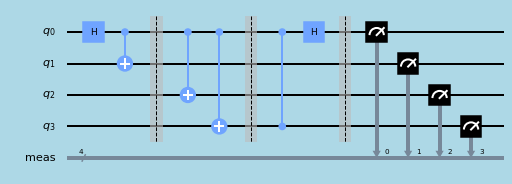

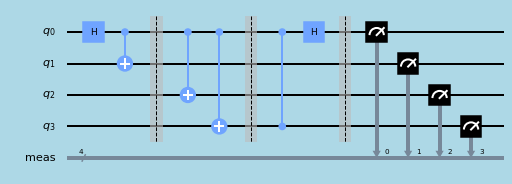

In [8]:
# Define the style to render the circuit and components
style = {'backgroundcolor': 'lightblue','gatefacecolor': 'white', 'gatetextcolor': 'black', 'fontsize': 9}
# Draw the mpl with the specified style
qc.draw('mpl', style=style)


In [3]:
# Import the Circuit to DAG converter
from qiskit.converters import circuit_to_dag
# Import the DAG drawer
from qiskit.tools.visualization import dag_drawer
# Convert the circuit into a DAG
dag = circuit_to_dag(qc)
# Draw the DAG of the circuit
dag_drawer(dag)


FileNotFoundError: [WinError 2] "dot" not found in path.

: 